## Шаг 1. Загрузите данные

<b>«Культурист-датасаентист»</b> предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц.
Набор данных включает следующие поля:

- 'Churn' — факт оттока в текущем месяце;

#### Текущие поля в датасете:

Данные пользователя за предыдущий до проверки факта оттока месяц:

- 'gender' — пол
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент в таком случае фитнес-центр хранит информацию о работодателе клиента)
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
- 'Phone' — наличие контактного телефона
- 'Age' — возраст
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)

#### Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
- 'Group_visits' — факт посещения групповых занятий
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

#### Путь к файлу

- <b>Путь к файлу</b>: /datasets/gym_churn.csv

## Шаг 2. Проведите исследовательский анализ данных (EDA)

- Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
- Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
- Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- Постройте матрицу корреляций и отобразите её.

## Шаг 3. Постройте модель прогнозирования оттока пользователей

#### Постройте модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце:

- Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
- Обучите модель на train-выборке любыми двумя способами: логистической регрессией и случайным лесом.
- Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

## Шаг 4. Сделайте кластеризацию пользователей

#### Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (пользователей):

- Стандартизируйте данные.
- Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
- Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
- Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
- Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
- Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

## Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

#### Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с пользователями и их удержания. Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.


In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
pd.set_option('display.max_columns', None)

## Шаг 1. Загрузите данные

In [3]:
df: pd.DataFrame = pd.read_csv('/datasets/gym_churn.csv')

In [6]:
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
df.columns = df.columns.str.lower()

In [7]:
display(df.info())
display(df.isna().sum())
display(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


None

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

0

<div class="alert alert-info">
    <h2> Комментарий учащегося</h2>
    
Данные загружены, полных дубликатов нет, пропущенных значений тоже, преобразование типов не нужно.
</div>

In [9]:
pd.options.display.float_format = '{:,.2f}'.format

In [10]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


In [ ]:
.style.highlight_max()

In [16]:
df.groupby('churn').agg('mean').T.style.highlight_max(axis=1)

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.74719,1.72856
group_visits,0.464103,0.268615
age,29.9765,26.9896
avg_additional_charges_total,158.446,115.083
month_to_end_contract,5.28309,1.66258


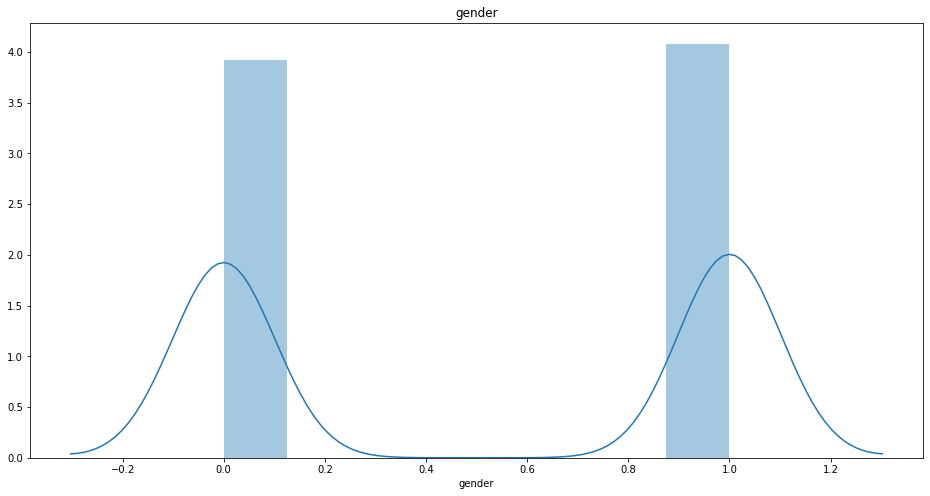

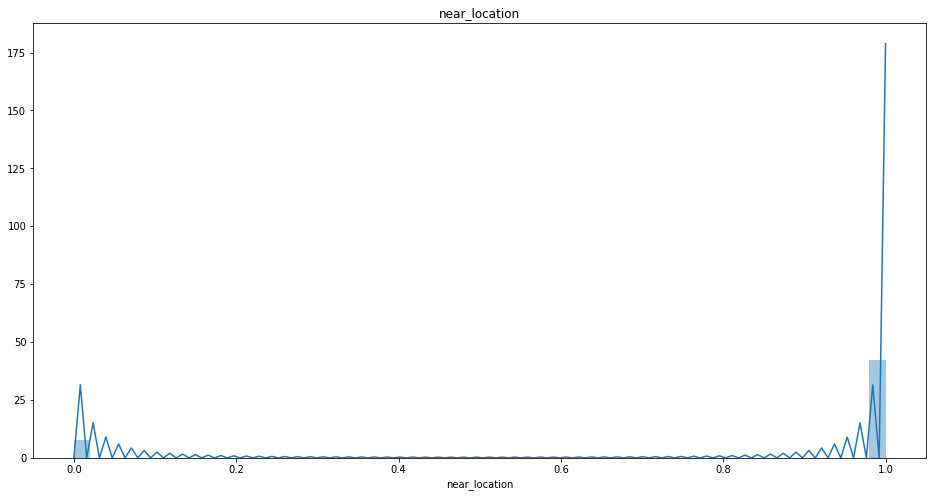

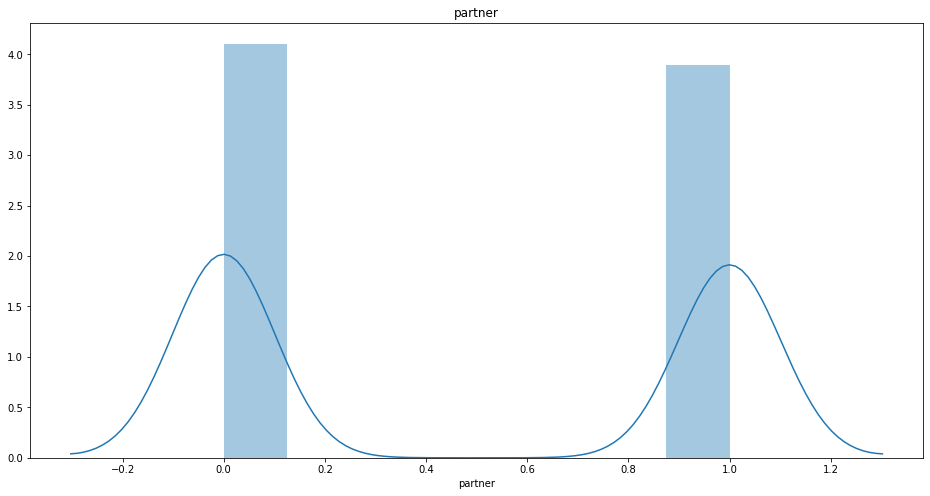

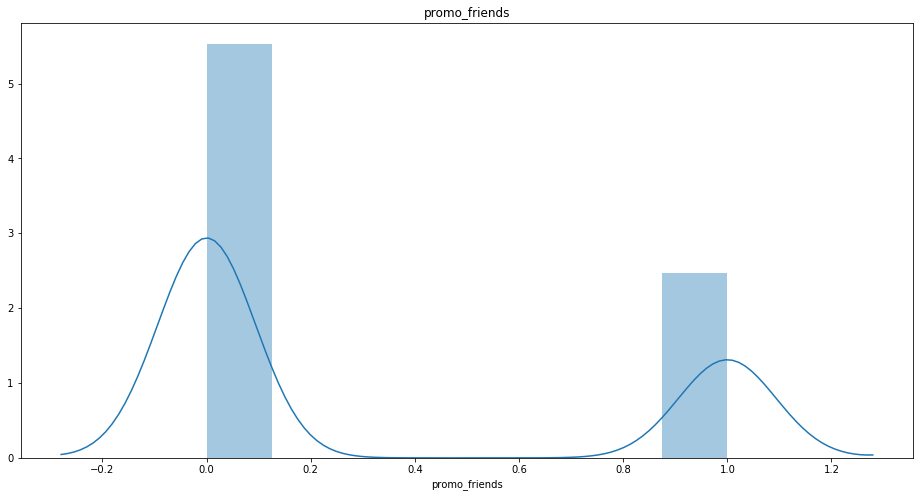

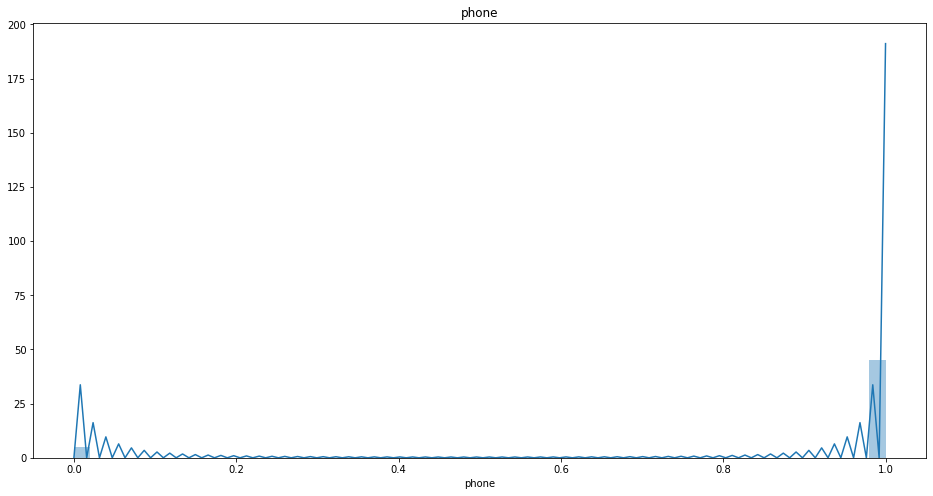

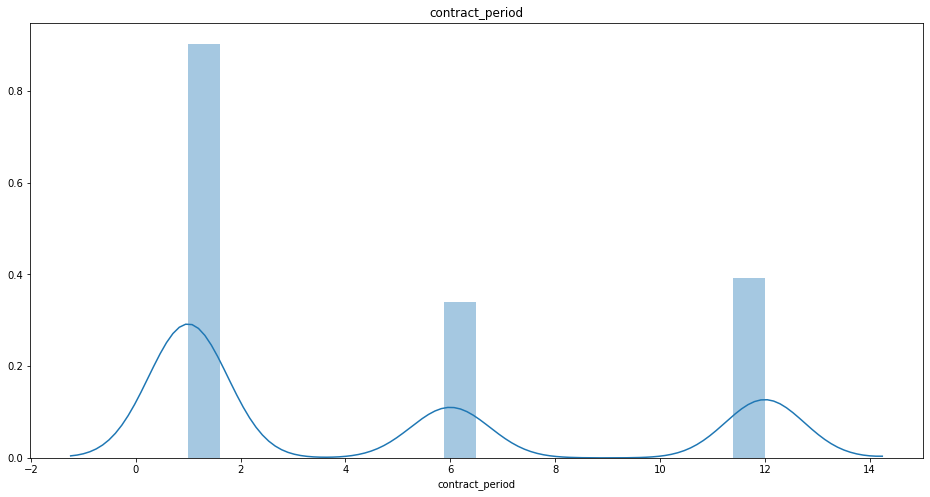

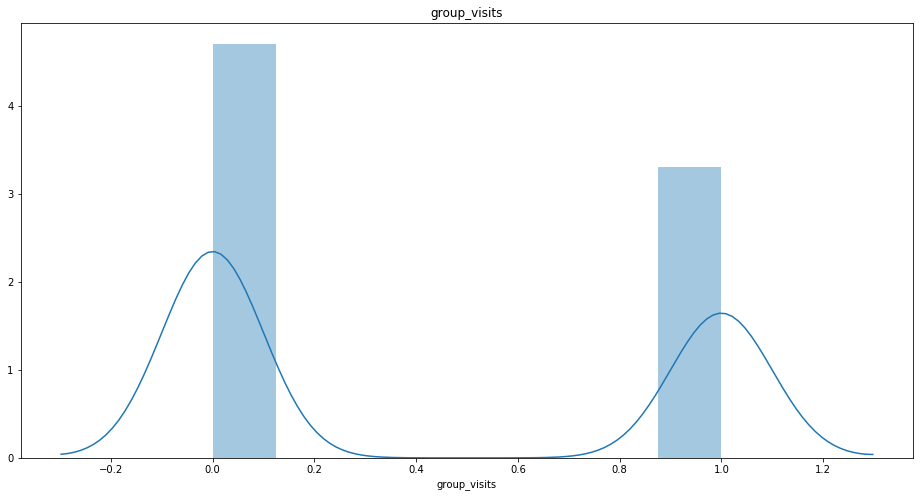

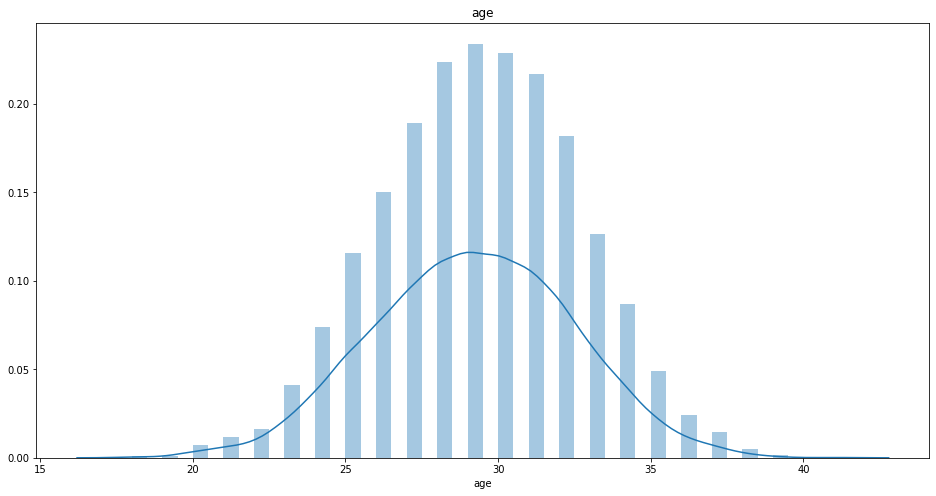

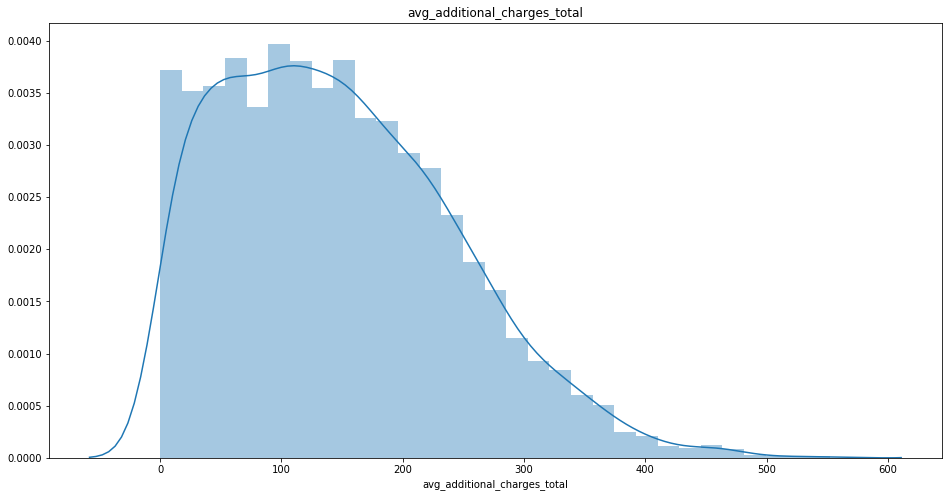

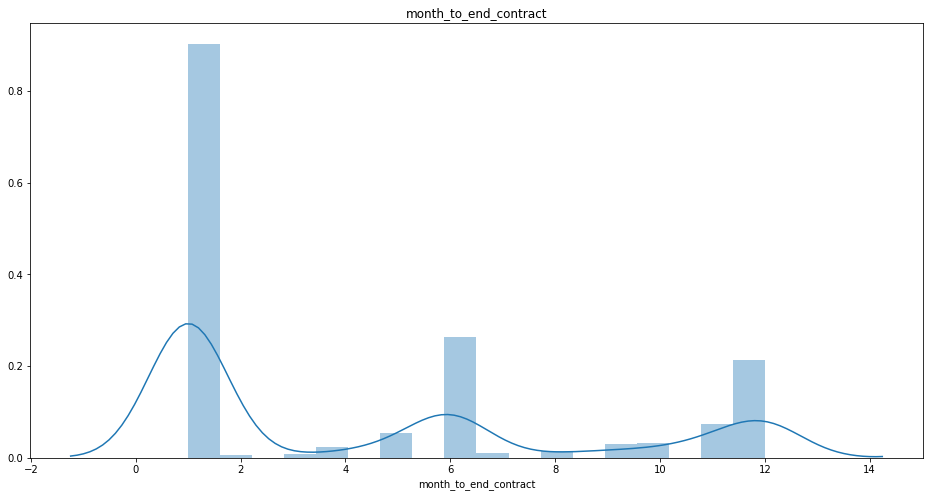

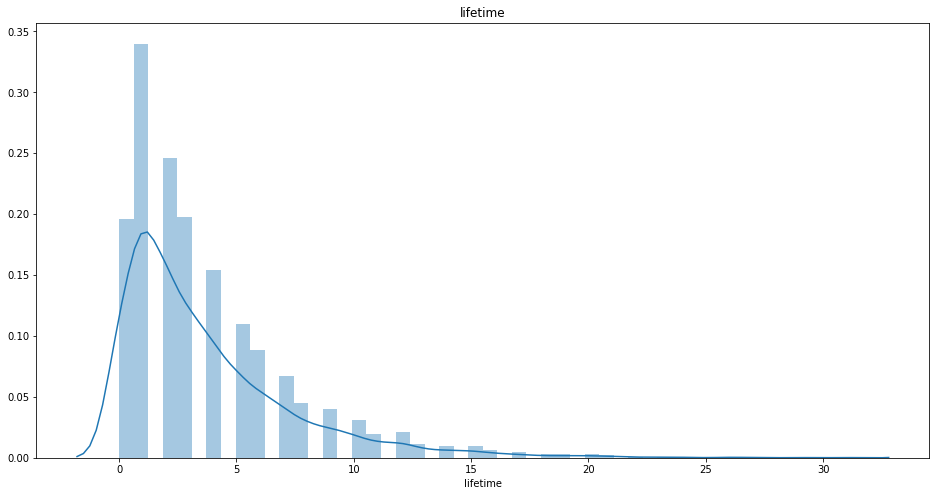

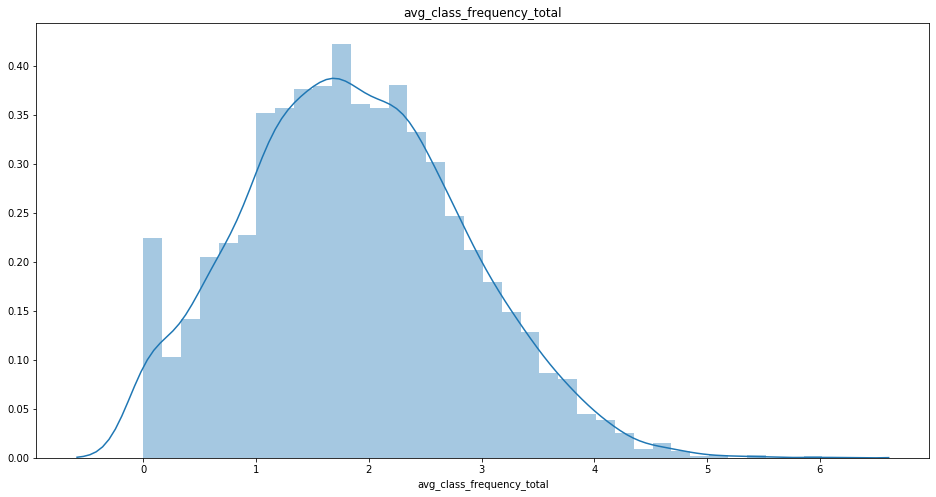

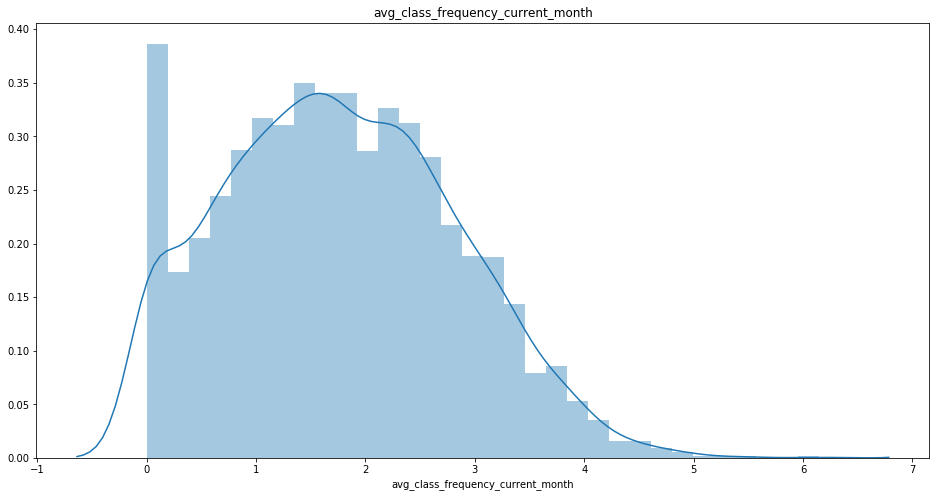

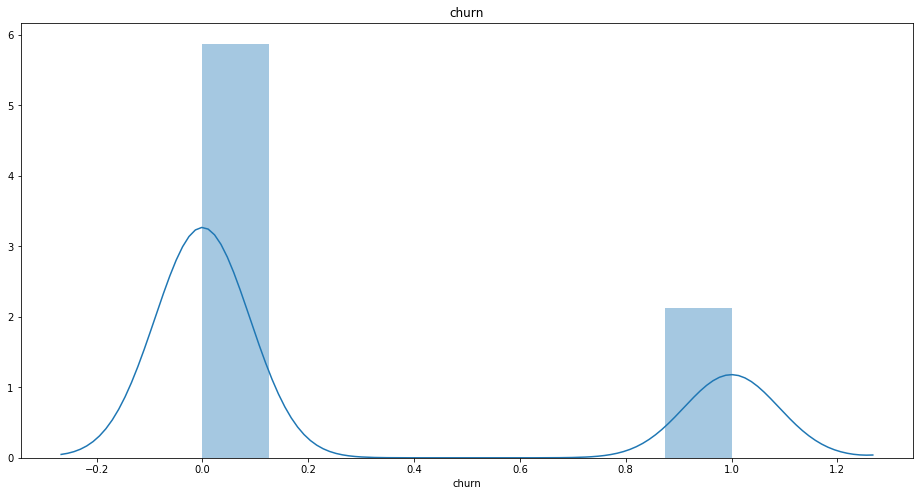

In [19]:
for column in df.columns:
    plt.figure(figsize=(16, 8))
    sns.distplot(df[column])
    plt.title(column)
    plt.show()

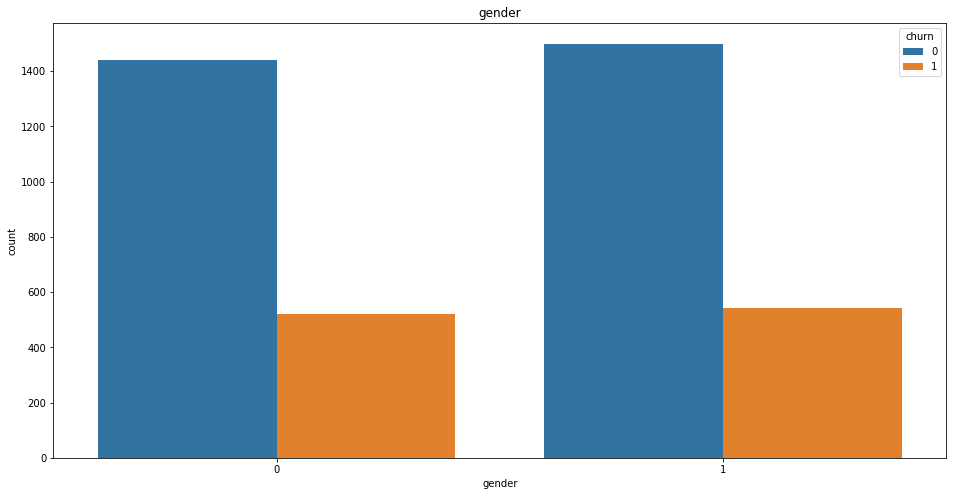

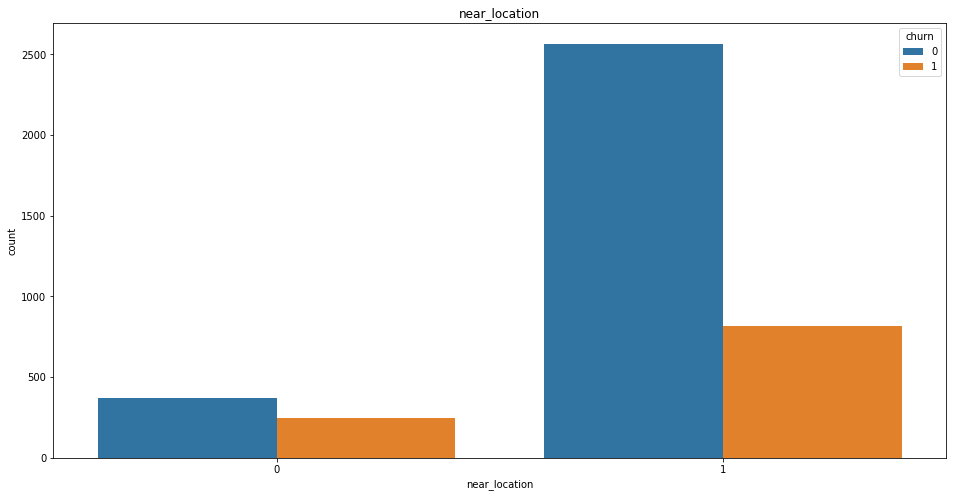

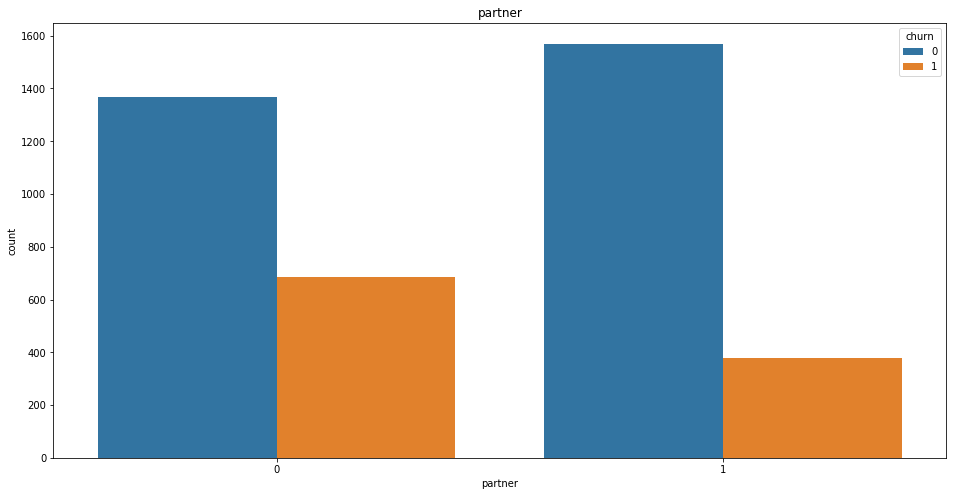

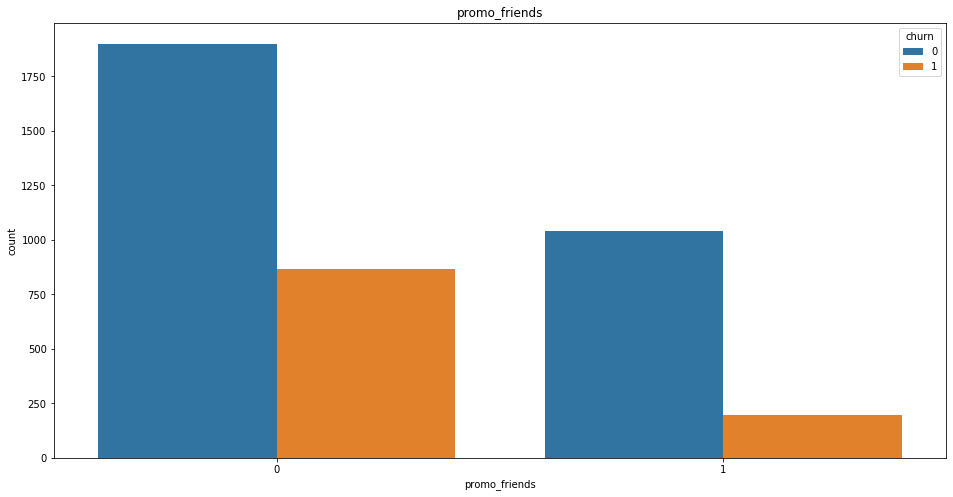

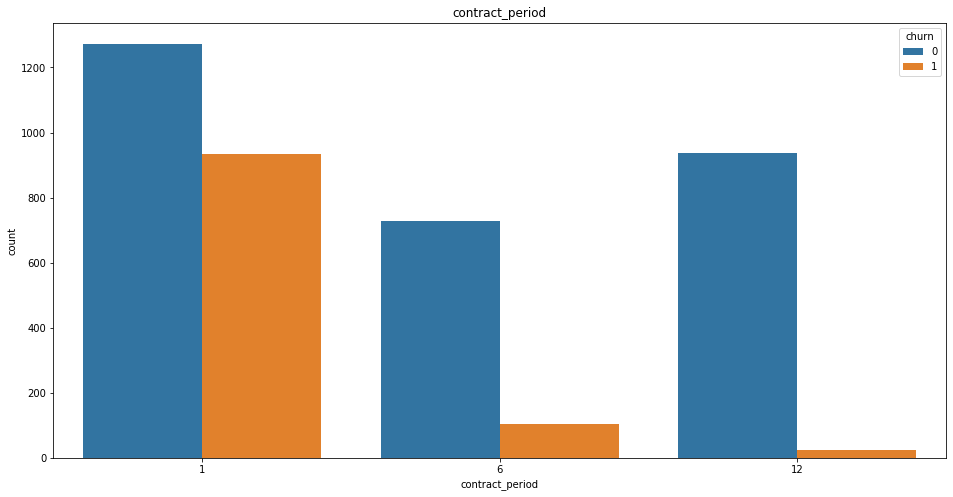

In [20]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(16, 8))
    sns.countplot(x = df[column], hue='churn', data=df)
    plt.title(column)
    plt.show()


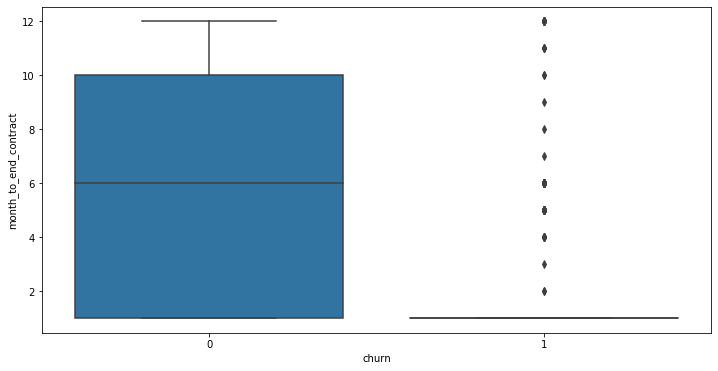

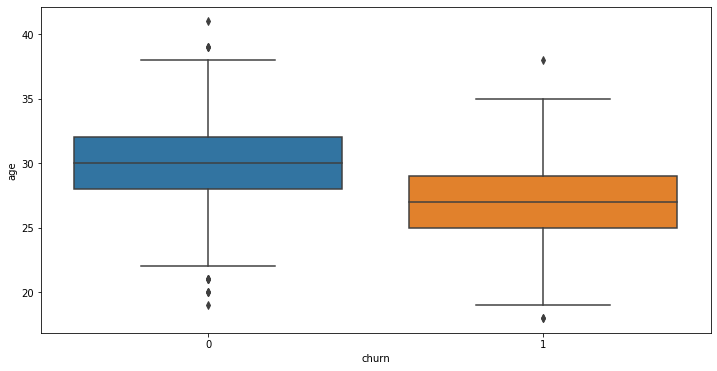

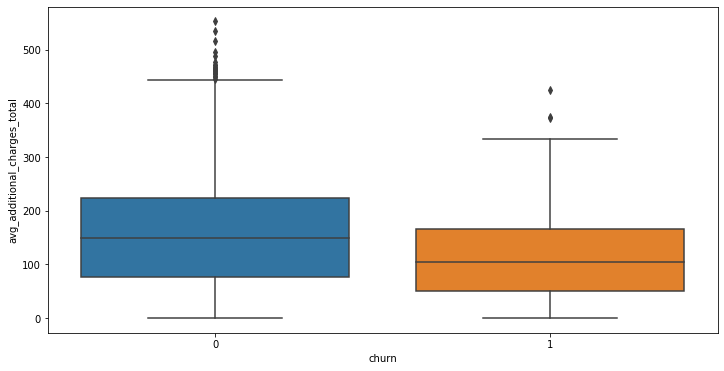

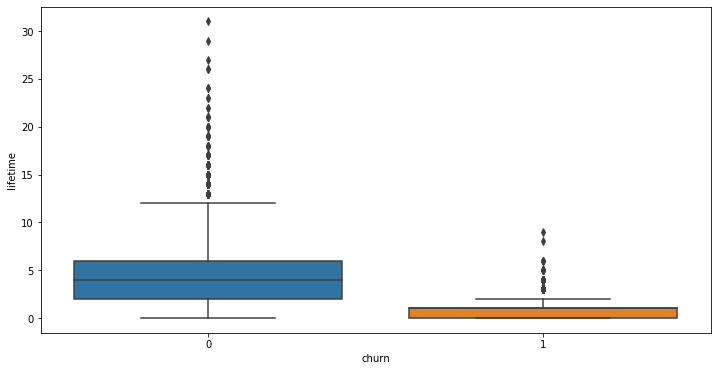

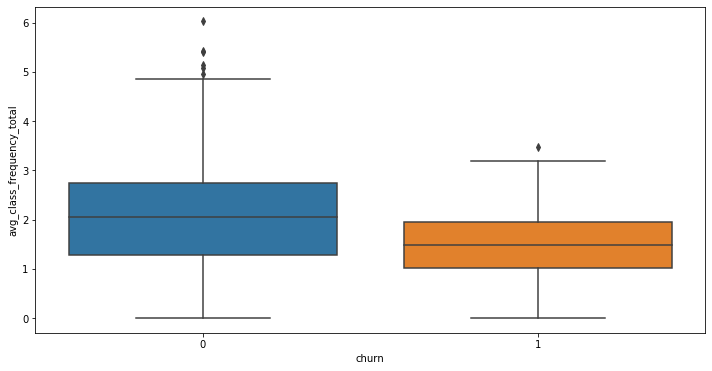

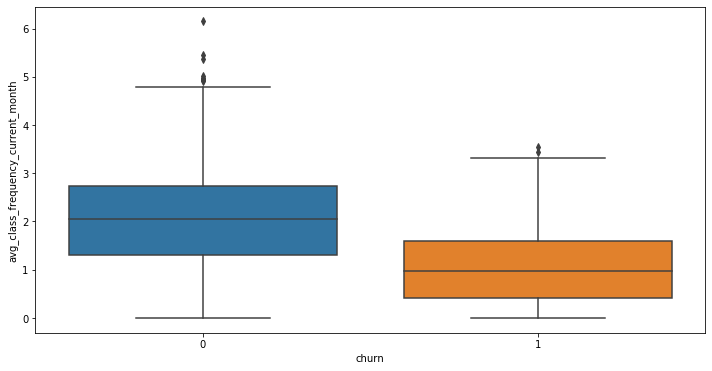

In [22]:
for column in [
                  'month_to_end_contract', 
                  'age', 
                  'avg_additional_charges_total',
                  'lifetime', 
                  'avg_class_frequency_total', 
                  'avg_class_frequency_current_month'
              ]:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x ='churn', y= df[column], data=df)
    plt.show()

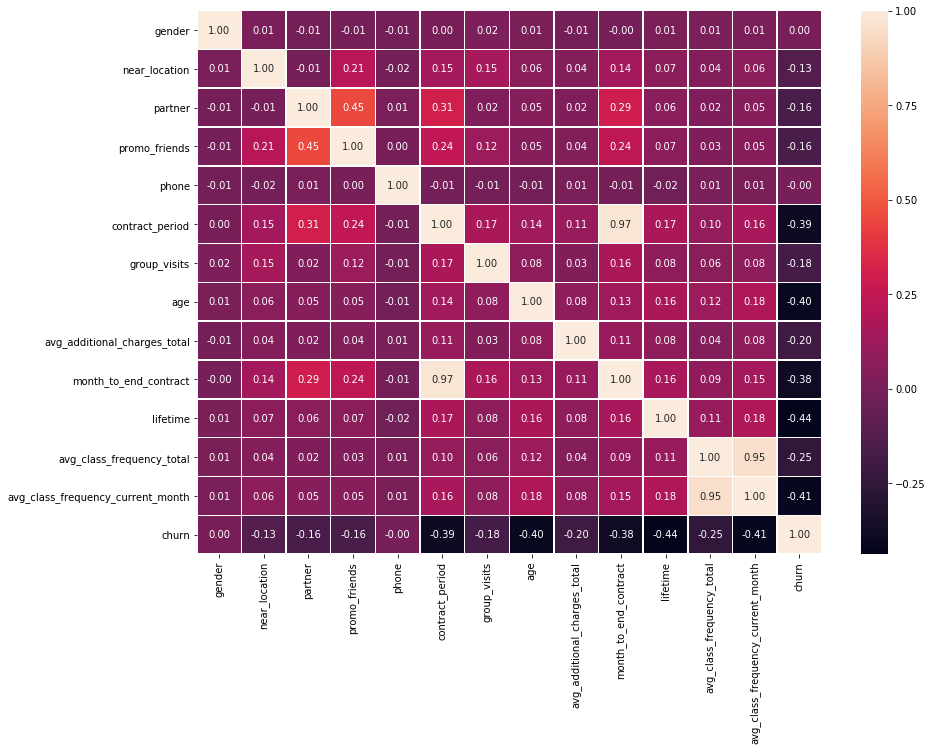

In [23]:
cm = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='0.2f', linewidths=.5)
plt.show()

<div class="alert alert-info">
    <h2> Комментарий учащегося</h2>
    
Из матрицы корреляции мы видим присутствие мультиколлинеарных признаков, а именно:

- contract_period - month_to_end_contract
- avg_class_frequency_current_month - avg_class_frequency_total

Кроме того, в матрице есть признаки с нулевой корреляцией (для целевой переменной):

- phone
- gender


</div>